In [1]:
import os
import pandas as pd
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D  # Para graficar en 3D

In [16]:
# Paso 1: Leer todos los archivos .csv de un directorio
directorio = "metricas/"  # Cambia esto por la ruta de tu directorio
archivos_csv = [archivo for archivo in os.listdir(directorio) if archivo.endswith('.csv')]

# Lista para almacenar los DataFrames
dataframes = []

# Leer cada archivo y almacenarlo en la lista
for archivo in archivos_csv:
    ruta_completa = os.path.join(directorio, archivo)
    df = pd.read_csv(ruta_completa)
    dataframes.append(df)

# Paso 2: Concatenar todos los DataFrames en uno solo
df_final = pd.concat(dataframes, ignore_index=True)
df_final = df_final.drop(columns=["G","Unnamed: 0"])
df_final.fillna(0, inplace=True)
df_final

,|V|,|E|,d,Q,K,L,N,CC,DS,PB
0,3,732,0.011794,0.819059,1.297297,2.076923,71,0.754286,PM,7
1,3,659,0.023751,0.751581,2.612613,1.475000,57,0.724696,PM,7
2,114,804,0.000000,0.000000,0.000000,0.000000,0,0.000000,PM,5
3,114,804,0.000000,0.000000,0.000000,0.000000,0,0.000000,PM,5
4,1,0,0.127054,0.443406,14.230088,1.367663,22,0.816810,PM,6
...,...,...,...,...,...,...,...,...,...,...
367,2,527489,0.007202,0.701306,20.129471,3.786907,770,0.583062,HC,9
368,0,80527,0.121416,0.488800,339.601858,2.028176,1,0.726492,HC,6
369,1344,555626,0.000004,0.750000,0.005502,1.000000,1450,0.000000,HC,1
370,38,549992,0.001481,0.834404,4.085507,4.899659,1976,0.653652,HC,1


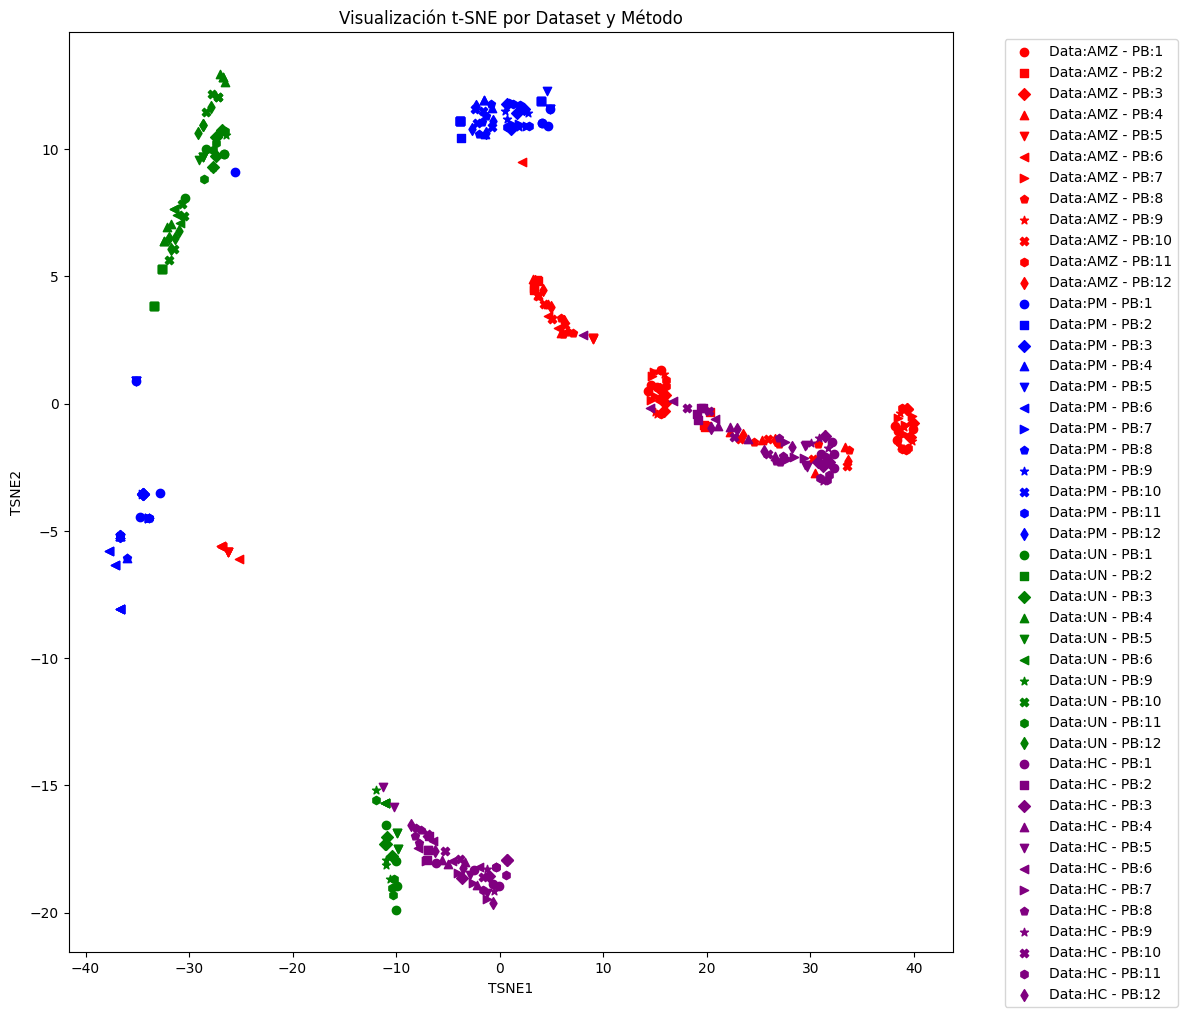

In [17]:

# Paso 3: Aplicar t-SNE a las 6 columnas numéricas
# Seleccionar solo las columnas numéricas (excluyendo "dataset" e "identificador")
columnas_numericas = df_final.columns.difference(['DS', 'PB'])
datos_numericos = df_final[columnas_numericas]

# Aplicar t-SNE
tsne = TSNE(n_components=2, random_state=42, perplexity=30)  # Ajusta perplexity si es necesario
tsne_resultados = tsne.fit_transform(datos_numericos)

# Paso 4: Graficar los resultados
# Crear un DataFrame con los resultados de t-SNE y las columnas originales
df_tsne = pd.DataFrame(tsne_resultados, columns=['TSNE1', 'TSNE2'])
df_tsne['DS'] = df_final['DS']
df_tsne['PB'] = df_final['PB']

# Definir colores y figuras para cada dataset y identificador
colores = {'AMZ': 'red', 'PM': 'blue', 'UN': 'green', 'HC': 'purple'}  # Colores para cada dataset
figuras = {1: 'o', 2: 's', 3: 'D', 4: '^', 5: 'v', 6: '<', 7: '>', 8: 'p', 9: '*', 10: 'X', 11: 'h', 12: 'd'}  # Figuras para cada identificador

# Crear la gráfica
plt.figure(figsize=(12, 11))

# Graficar cada punto con su color y figura correspondiente
for dataset, color in colores.items():
    for identificador, figura in figuras.items():
        # Filtrar los puntos que pertenecen a este dataset y identificador
        filtro = (df_tsne['DS'] == dataset) & (df_tsne['PB'] == identificador)
        puntos = df_tsne[filtro]
        
        # Graficar los puntos
        if not puntos.empty:
            plt.scatter(puntos['TSNE1'], puntos['TSNE2'], 
                        c=color, marker=figura, 
                        label=f'Data:{dataset} - PB:{identificador}')

# Añadir leyenda y etiquetas
plt.title('Visualización t-SNE por Dataset y Método')
plt.xlabel('TSNE1')
plt.ylabel('TSNE2')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')  # Leyenda fuera del gráfico
plt.tight_layout()  # Ajustar el layout para que la leyenda no se solape
plt.show()

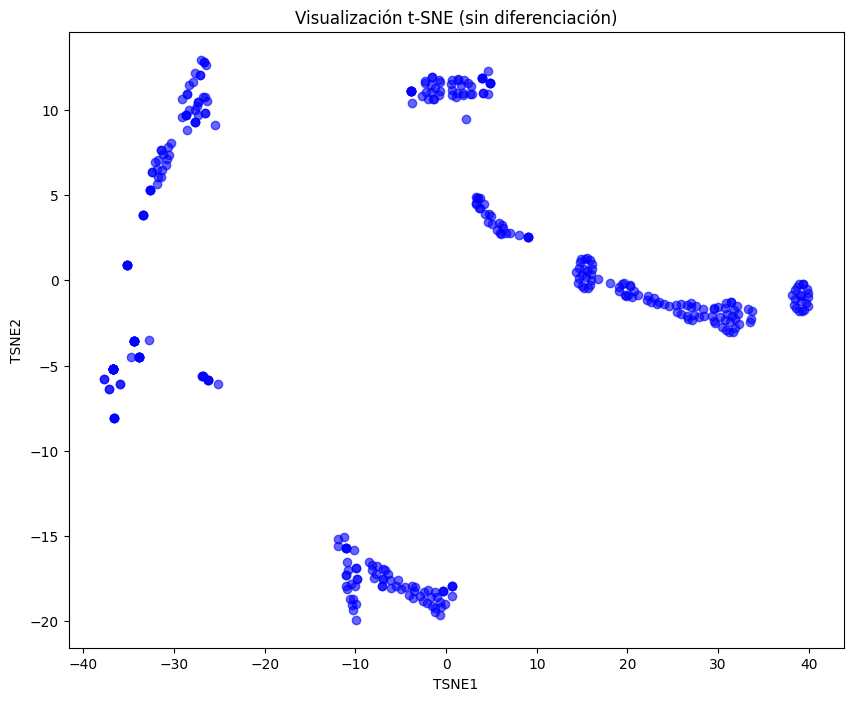

In [18]:
# Aplicar t-SNE
tsne = TSNE(n_components=2, random_state=42, perplexity=30)  # Ajusta perplexity si es necesario
tsne_resultados = tsne.fit_transform(datos_numericos)

# Paso 4: Graficar los resultados
# Crear un DataFrame con los resultados de t-SNE
df_tsne = pd.DataFrame(tsne_resultados, columns=['TSNE1', 'TSNE2'])

# Graficar todos los puntos de manera uniforme
plt.figure(figsize=(10, 8))
plt.scatter(df_tsne['TSNE1'], df_tsne['TSNE2'], c='blue', alpha=0.6)  # Todos los puntos en azul
plt.title('Visualización t-SNE (sin diferenciación)')
plt.xlabel('TSNE1')
plt.ylabel('TSNE2')
plt.show()

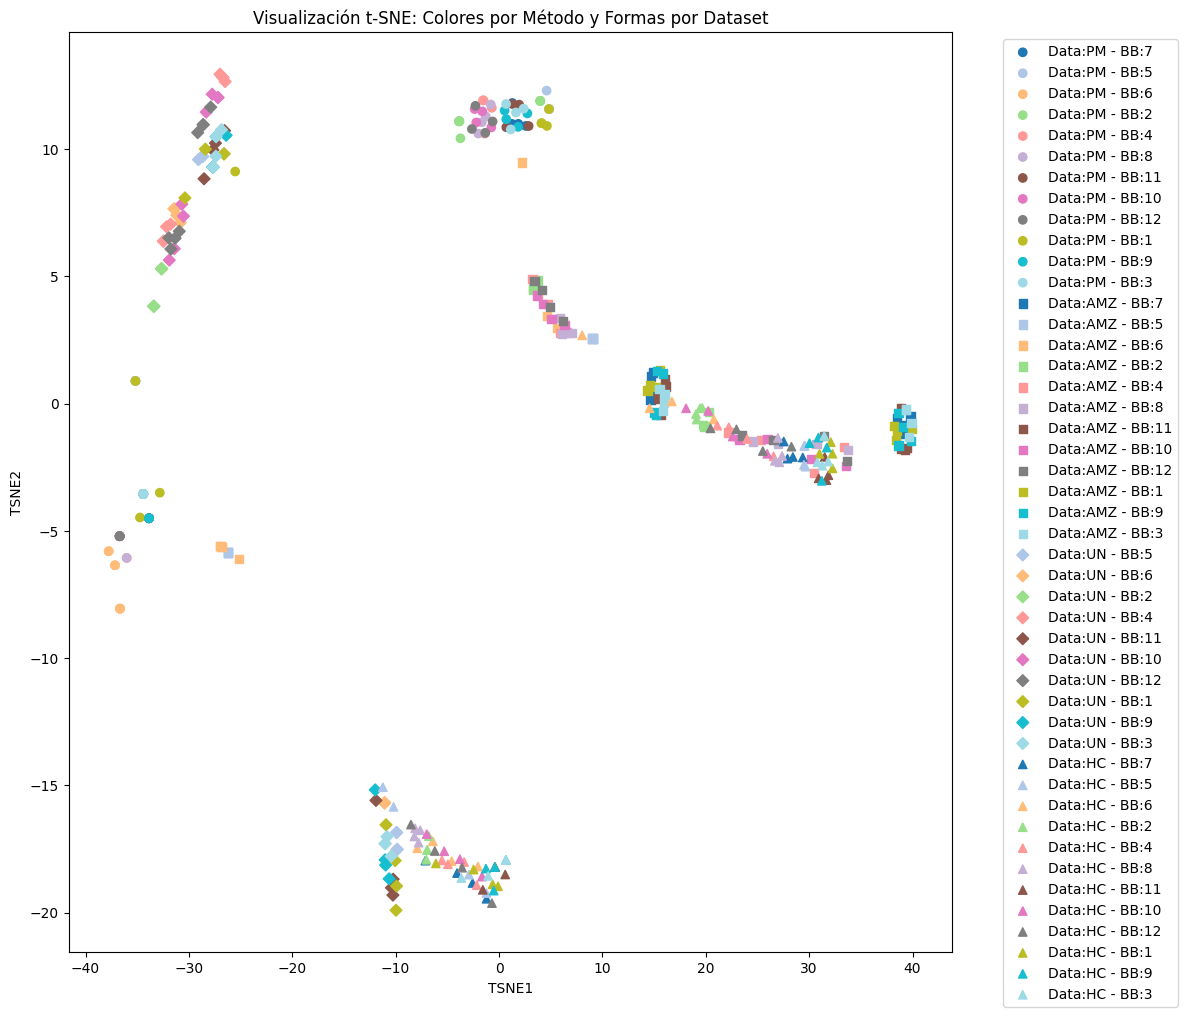

In [19]:
# Aplicar t-SNE
tsne = TSNE(n_components=2, random_state=42, perplexity=30)  # Ajusta perplexity si es necesario
tsne_resultados = tsne.fit_transform(datos_numericos)

# Paso 4: Graficar los resultados
# Crear un DataFrame con los resultados de t-SNE y las columnas originales
df_tsne = pd.DataFrame(tsne_resultados, columns=['TSNE1', 'TSNE2'])
df_tsne['DS'] = df_final['DS']
df_tsne['PB'] = df_final['PB']

# Definir colores para los métodos (12 métodos) y formas para los datasets (4 datasets)

colores = plt.get_cmap('tab20', 12)  # 12 colores para los métodos
formas = ['o', 's', 'D', '^']  # 4 formas para los datasets

# Crear la gráfica
plt.figure(figsize=(12, 11))

# Graficar cada punto con su color y figura correspondiente
for i, dataset in enumerate(df_tsne['DS'].unique()):  # Iterar sobre los datasets
    for j, identificador in enumerate(df_tsne['PB'].unique()):  # Iterar sobre los métodos
        # Filtrar los puntos que pertenecen a este dataset y método
        filtro = (df_tsne['DS'] == dataset) & (df_tsne['PB'] == identificador)
        puntos = df_tsne[filtro]
        
        # Graficar los puntos
        if not puntos.empty:
            plt.scatter(puntos['TSNE1'], puntos['TSNE2'], 
                        c=[colores(j)] * len(puntos),  # Color según el método
                        marker=formas[i],  # Forma según el dataset
                        label=f'Data:{dataset} - BB:{identificador}')

# Añadir leyenda y etiquetas
plt.title('Visualización t-SNE: Colores por Método y Formas por Dataset')
plt.xlabel('TSNE1')
plt.ylabel('TSNE2')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')  # Leyenda fuera del gráfico
plt.tight_layout()  # Ajustar el layout para que la leyenda no se solape
plt.show()

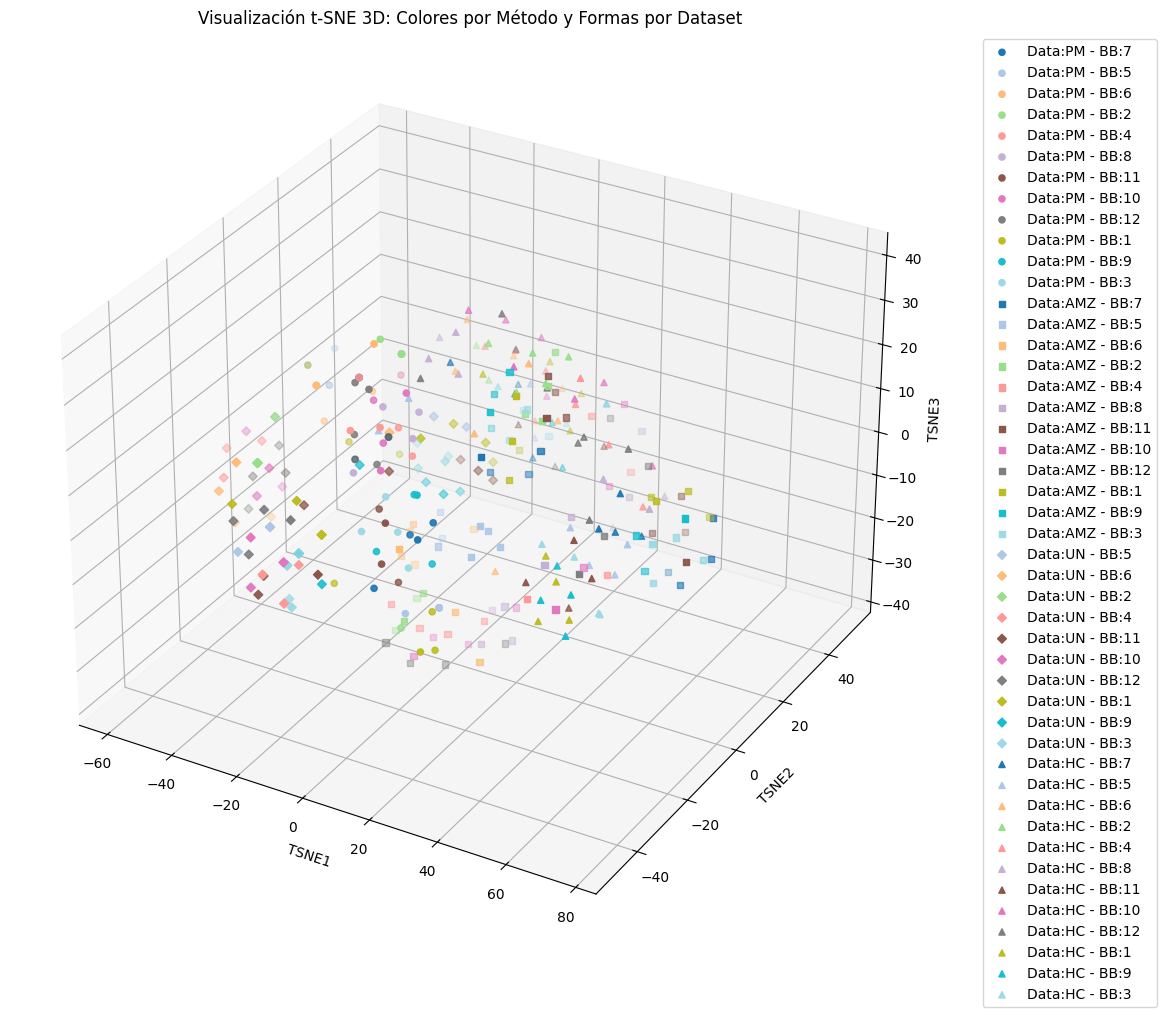

In [20]:

# Aplicar t-SNE en 3D
tsne = TSNE(n_components=3, random_state=42, perplexity=30)  # n_components=3 para 3D
tsne_resultados = tsne.fit_transform(datos_numericos)

# Paso 4: Graficar los resultados en 3D
# Crear un DataFrame con los resultados de t-SNE y las columnas originales
df_tsne = pd.DataFrame(tsne_resultados, columns=['TSNE1', 'TSNE2', 'TSNE3'])
df_tsne['DS'] = df_final['DS']
df_tsne['PB'] = df_final['PB']

# Definir colores para los métodos (12 métodos) y formas para los datasets (4 datasets)
colores = plt.get_cmap('tab20', 12)  # 12 colores para los métodos

formas = ['o', 's', 'D', '^']  # 4 formas para los datasets

# Crear la gráfica en 3D
fig = plt.figure(figsize=(12, 11))
ax = fig.add_subplot(111, projection='3d')  # Crear un subplot 3D

# Graficar cada punto con su color y figura correspondiente
for i, dataset in enumerate(df_tsne['DS'].unique()):  # Iterar sobre los datasets
    for j, identificador in enumerate(df_tsne['PB'].unique()):  # Iterar sobre los métodos
        # Filtrar los puntos que pertenecen a este dataset y método
        filtro = (df_tsne['DS'] == dataset) & (df_tsne['PB'] == identificador)
        puntos = df_tsne[filtro]
        
        # Graficar los puntos en 3D
        if not puntos.empty:
            ax.scatter(puntos['TSNE1'], puntos['TSNE2'], puntos['TSNE3'], 
                       c=[colores(j)] * len(puntos),  # Color según el método
                       marker=formas[i],  # Forma según el dataset
                       label=f'Data:{dataset} - BB:{identificador}')

# Añadir leyenda y etiquetas
ax.set_title('Visualización t-SNE 3D: Colores por Método y Formas por Dataset')
ax.set_xlabel('TSNE1')
ax.set_ylabel('TSNE2')
ax.set_zlabel('TSNE3')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')  # Leyenda fuera del gráfico
plt.tight_layout()  # Ajustar el layout para que la leyenda no se solape
plt.show()

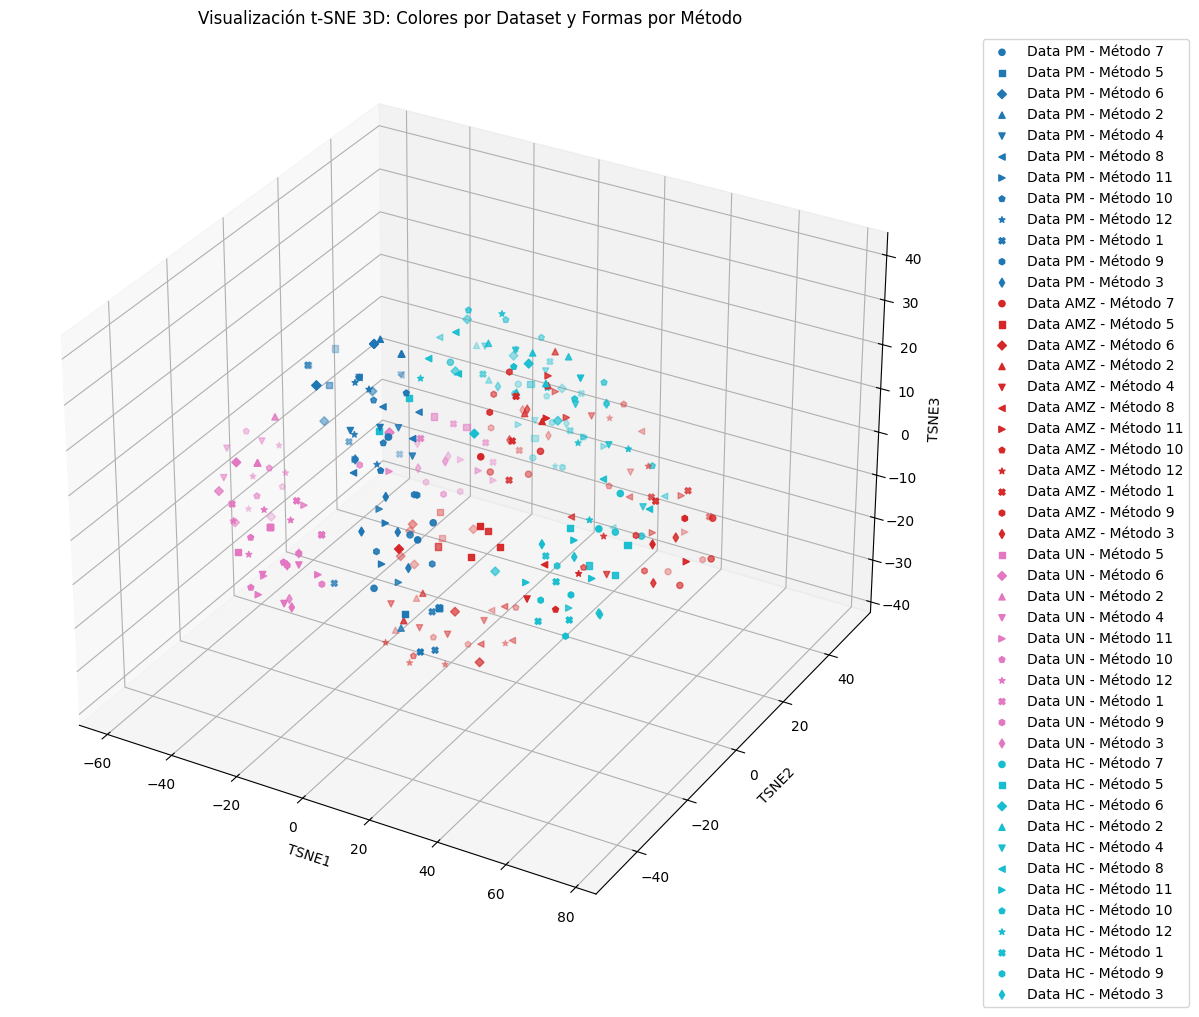

In [21]:
tsne = TSNE(n_components=3, random_state=42, perplexity=30)  # n_components=3 para 3D
tsne_resultados = tsne.fit_transform(datos_numericos)

# Paso 4: Graficar los resultados en 3D
# Crear un DataFrame con los resultados de t-SNE y las columnas originales
df_tsne = pd.DataFrame(tsne_resultados, columns=['TSNE1', 'TSNE2', 'TSNE3'])
df_tsne['DS'] = df_final['DS']
df_tsne['PB'] = df_final['PB']

# Definir colores para los datasets (4 datasets) y formas para los métodos (12 métodos)
colores = plt.get_cmap('tab10', 4)  # 4 colores para los datasets

formas = ['o', 's', 'D', '^', 'v', '<', '>', 'p', '*', 'X', 'h', 'd']  # 12 formas para los métodos

# Crear la gráfica en 3D
fig = plt.figure(figsize=(12, 11))
ax = fig.add_subplot(111, projection='3d')  # Crear un subplot 3D

# Graficar cada punto con su color y figura correspondiente
for i, dataset in enumerate(df_tsne['DS'].unique()):  # Iterar sobre los datasets
    for j, identificador in enumerate(df_tsne['PB'].unique()):  # Iterar sobre los métodos
        # Filtrar los puntos que pertenecen a este dataset y método
        filtro = (df_tsne['DS'] == dataset) & (df_tsne['PB'] == identificador)
        puntos = df_tsne[filtro]
        
        # Graficar los puntos en 3D
        if not puntos.empty:
            ax.scatter(puntos['TSNE1'], puntos['TSNE2'], puntos['TSNE3'], 
                       c=[colores(i)] * len(puntos),  # Color según el dataset
                       marker=formas[j],  # Forma según el método
                       label=f'Data {dataset} - Método {identificador}')

# Añadir leyenda y etiquetas
ax.set_title('Visualización t-SNE 3D: Colores por Dataset y Formas por Método')
ax.set_xlabel('TSNE1')
ax.set_ylabel('TSNE2')
ax.set_zlabel('TSNE3')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')  # Leyenda fuera del gráfico
plt.tight_layout()  # Ajustar el layout para que la leyenda no se solape
plt.show()